In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, precision_recall_curve, auc
from plotly.subplots import make_subplots
import itertools
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Breast%20Cancer%20Wisconsin%20(Diagnostic)%20Data%20Set/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
missing_values_count = df.isnull().sum()
missing_values_count

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [5]:
df.shape

(569, 31)

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


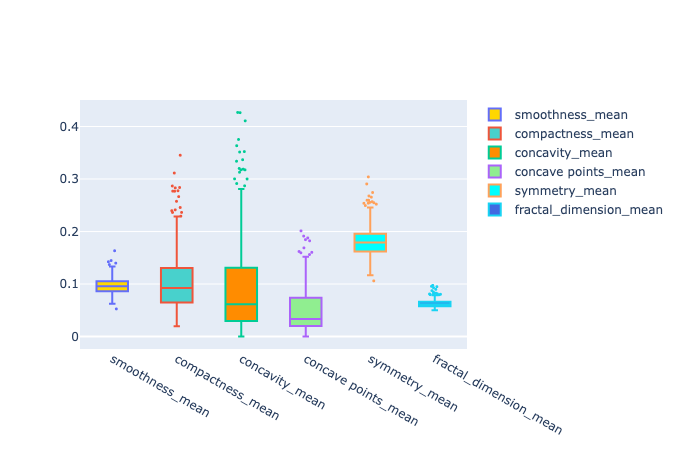

In [8]:
names = df.columns[5:11]
# convert DataFrame to list
values=[] 
for column in df.iloc[:,5:11].columns:
    li = df[column].tolist()
    values.append(li)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan', 'royalblue']

fig = go.Figure()
for xd, yd, cls in zip(names, values, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='outliers',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=3,
            line_width=2)
        )
fig.show()

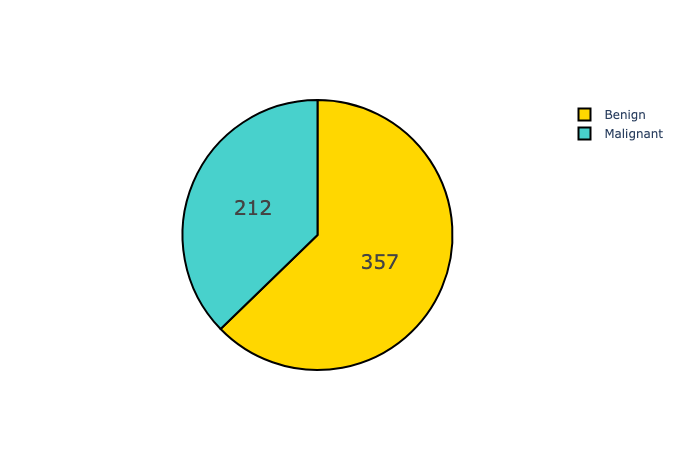

In [9]:
fig = go.Figure(data=[go.Pie(labels=['Benign','Malignant'], values=df['diagnosis'].value_counts(), textinfo='label+percent')])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=2)))
fig.show()

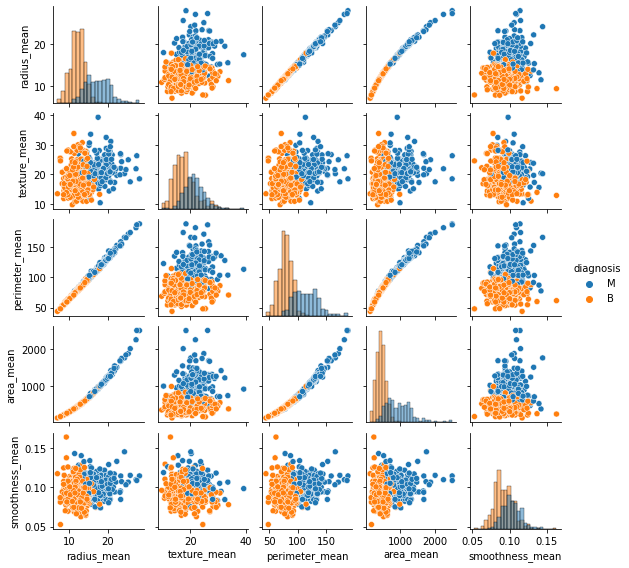

In [10]:
sns.pairplot(df.iloc[:,:6],hue='diagnosis', diag_kind='hist',height=1.6)

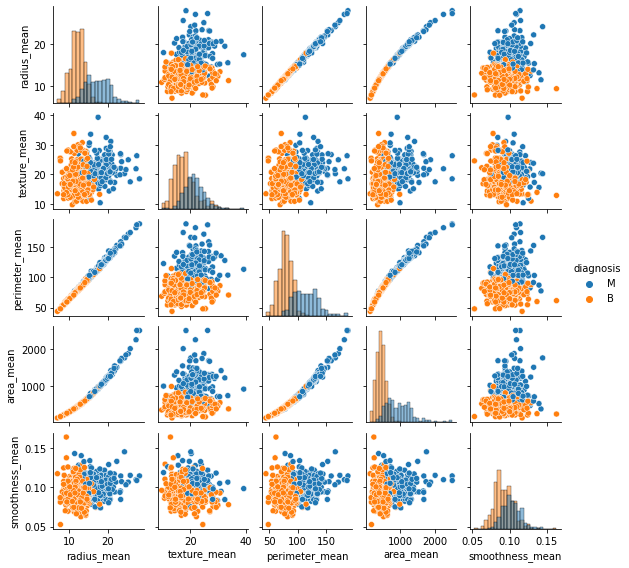

In [11]:
sns.pairplot(df.iloc[:,:6],hue='diagnosis', diag_kind='hist',height=1.6)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis']) # M:1, B:0
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [13]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['diagnosis'], test_size = 0.2, random_state = random_state)

In [14]:
scale = RobustScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

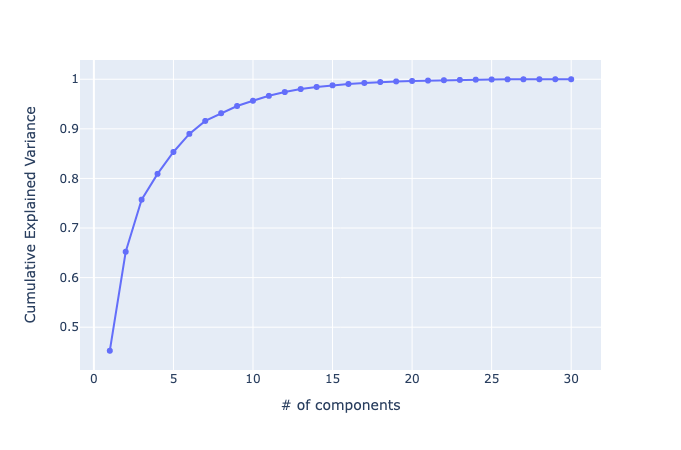

In [15]:
pca = PCA()
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.line(x=np.arange(1,exp_var_cumul.shape[0]+1), y=exp_var_cumul, markers=True, labels={'x':'# of components', 'y':'Cumulative Explained Variance'})


fig.show()

In [18]:
def modelselection(classifier, parameters, scoring, X_train):
    clf = GridSearchCV(estimator=classifier,
                   param_grid=parameters,
                   scoring= scoring,
                   cv=5,
                   n_jobs=-1)
    clf.fit(X_train, y_train)
    cv_results = clf.cv_results_
    best_parameters = clf.best_params_
    best_result = clf.best_score_
    print('The best parameters for classifier is', best_parameters)
    print('The best training score is %.3f:'% best_result)
    return cv_results, best_parameters, best_result

In [19]:
def PCA_curves(PCA_cv_score, PCA_test_score, training_time):
    fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "scatter"}, {"type": "scatter"}]],
    subplot_titles=('# of Components in PCA versus Model Accuracy','# of Components in PCA versus Training Time')
    )
    
    fig.add_trace(go.Scatter(x=n,y=PCA_cv_score,
                             line=dict(color='rgb(231,107,243)', width=2), name='CV score'),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=n,y=PCA_test_score,
                             line=dict(color='rgb(0,176,246)', width=2), name='Test score'),              
                  row=1, col=1)    
    fig.add_trace(go.Scatter(x=n,y=training_time,
                             line=dict(color='rgb(0,100,80)', width=2), name='Training time'),
                  row=1, col=2)
    fig.update_xaxes(title_text='# of components')
    fig.update_yaxes(title_text='Accuracy', row=1, col=1)
    fig.update_yaxes(title_text='Training time', row=1, col=2)
    fig.show()

In [20]:
def metrics(X,CV_clf):
    y_pred = CV_clf.predict(X)
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    Sensitivity=tp/(tp+fn)
    Specificity=tn/(tn+fp)
    Precision=tp/(tp+fp)
    F_measure=2*tp/(2*tp+fp+fn)
    print('Accuracy=%.3f'%Accuracy)
    print('Sensitivity=%.3f'%Sensitivity) # as the same as recall
    print('Specificity=%.3f'%Specificity)
    print('Precision=%.3f'%Precision)
    print('F-measure=%.3f'%F_measure)
    return Accuracy, Sensitivity, Specificity, Precision, F_measure

In [21]:
def plot_roc_prc():
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{"type": "scatter"}, {"type": "scatter"}]],
        subplot_titles=(f'ROC Curve (AUC={auc(fpr, tpr):.4f})',f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})')
    )
    fig.add_trace(go.Scatter(x=fpr, y=tpr),row=1, col=1)
    fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0, y1=1,row=1, col=1)
    fig.add_trace(go.Scatter(x=recall, y=precision),row=1, col=2)
    fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0.5, y1=0.5,row=1, col=2)
    fig.update_xaxes(title_text="False Positive Rate / 1-Specificity", row=1, col=1)
    fig.update_yaxes(title_text="True Positive Rate / Recall", row=1, col=1)
    fig.update_xaxes(title_text="Recall", row=1, col=2)
    fig.update_yaxes(title_text="Precision", row=1, col=2)
    fig.show()

In [22]:
classifier_log = LogisticRegression(random_state=random_state,solver='lbfgs', max_iter=1000)
parameters_log = {
            'penalty' : ['l2'],  
            'C' : [0.01, 0.1, 1, 10, 100]
}
scoring='accuracy'  
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_train)

The best parameters for classifier is {'C': 10, 'penalty': 'l2'}
The best training score is 0.978:


In [23]:
def compare_pca(n_components):
    cv_score, test_score, cv_training_time = [], [], []
    for n in n_components:
        print("The number of components in PCA is:%d "% n)
        pca = PCA(n_components=n, svd_solver="full",random_state=random_state)
        X_PCA_train = pca.fit_transform(X_train)
        X_PCA_test = pca.transform(X_test)
        cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)
        training_time = np.mean(np.array(cv_results['mean_fit_time'])+np.array(cv_results['mean_score_time']))
        cv_score.append(best_result)
        cv_training_time.append(training_time)
        CV_clf = LogisticRegression(penalty = best_param['penalty'],
                                    C = best_param['C'],
                                    random_state=random_state)
        CV_clf.fit(X_PCA_train, y_train)
        score = CV_clf.score(X_PCA_test, y_test)
        test_score.append(score)
    print(cv_score, test_score, cv_training_time)
    return cv_score, test_score, cv_training_time
n_features = X_train.shape[1]
n = np.arange(2, n_features+2, 2) 

PCA_cv_score, PCA_test_score, PCA_cv_training_time= compare_pca(n_components = n)

The number of components in PCA is:2 
The best parameters for classifier is {'C': 100, 'penalty': 'l2'}
The best training score is 0.921:
The number of components in PCA is:4 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.954:
The number of components in PCA is:6 
The best parameters for classifier is {'C': 10, 'penalty': 'l2'}
The best training score is 0.965:
The number of components in PCA is:8 
The best parameters for classifier is {'C': 0.1, 'penalty': 'l2'}
The best training score is 0.967:
The number of components in PCA is:10 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.974:
The number of components in PCA is:12 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.969:
The number of components in PCA is:14 
The best parameters for classifier is {'C': 1, 'penalty': 'l2'}
The best training score is 0.974:
The number of components in PCA is:16 
T

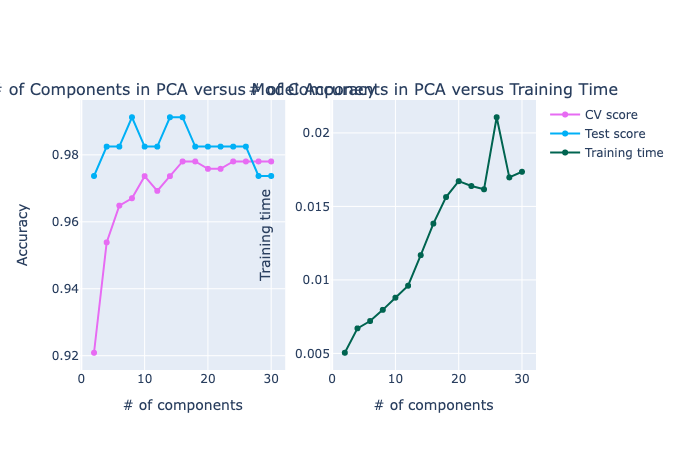

In [24]:
PCA_curves(PCA_cv_score,PCA_test_score,PCA_cv_training_time)

In [25]:
i =PCA_test_score.index(max(PCA_test_score))
print('The best accuracy of logistic regression classifier is: %.3f'%  max(PCA_test_score)+', where the total number of components in PCA is {:.0f}'.format((i+1)*2))

The best accuracy of logistic regression classifier is: 0.991, where the total number of components in PCA is 8


The best parameters for classifier is {'C': 0.1, 'penalty': 'l2'}
The best training score is 0.967:
Accuracy=0.991
Sensitivity=0.977
Specificity=1.000
Precision=1.000
F-measure=0.988


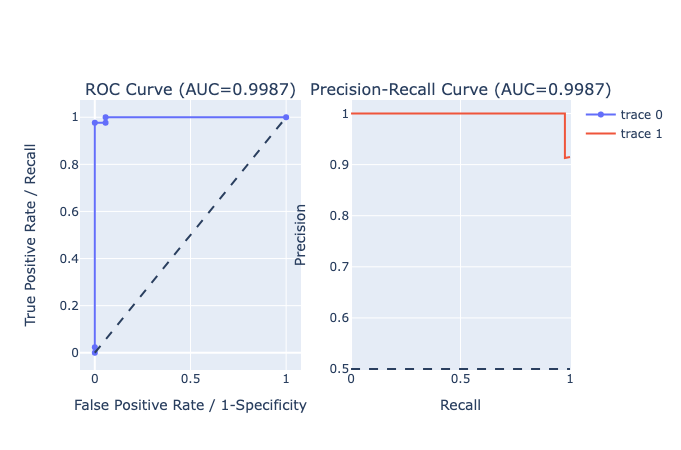

In [26]:
pca = PCA(n_components=(i+1)*2, svd_solver="full",random_state=random_state)
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)

logReg_PCA = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_PCA.fit(X_PCA_train, y_train)

logReg_PCA_metrics = metrics(X_PCA_test,logReg_PCA)

y_score = logReg_PCA.predict_proba(X_PCA_test)[:, 1] # predict probabilities
plot_roc_prc()

threshold = 0.1 : Accuracy=0.912 Sensitivity=1.000 Specificity=0.859 Precision=0.811
threshold = 0.2 : Accuracy=0.956 Sensitivity=1.000 Specificity=0.930 Precision=0.896
threshold = 0.3 : Accuracy=0.956 Sensitivity=0.977 Specificity=0.944 Precision=0.913
threshold = 0.4 : Accuracy=0.982 Sensitivity=0.977 Specificity=0.986 Precision=0.977
threshold = 0.5 : Accuracy=0.991 Sensitivity=0.977 Specificity=1.000 Precision=1.000
threshold = 0.6 : Accuracy=0.974 Sensitivity=0.930 Specificity=1.000 Precision=1.000
threshold = 0.7 : Accuracy=0.956 Sensitivity=0.884 Specificity=1.000 Precision=1.000
threshold = 0.8 : Accuracy=0.947 Sensitivity=0.860 Specificity=1.000 Precision=1.000
threshold = 0.9 : Accuracy=0.930 Sensitivity=0.814 Specificity=1.000 Precision=1.000


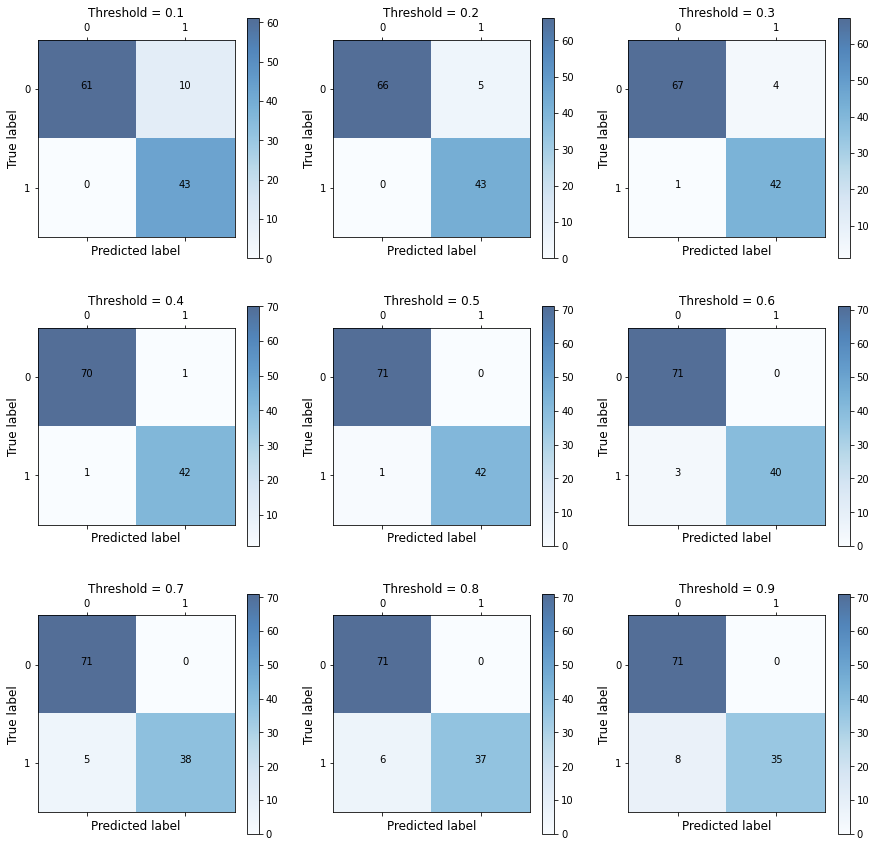

In [27]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for n, ax in zip(thresholds,axs.ravel()):
    y_score = logReg_PCA.predict_proba(X_PCA_test)[:,1] > n
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('threshold = %s :'%n,
          'Accuracy={:.3f}'.format((tp+tn)/(tp+tn+fp+fn)),
          'Sensitivity={:.3f}'.format(tp/(tp+fn)),
          'Specificity={:.3f}'.format(tn/(tn+fp)),
          'Precision={:.3f}'.format(tp/(tp+fp)))
    
    im=ax.matshow(cm, cmap='Blues', alpha=0.7)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        ax.text(j, i, cm[i, j], horizontalalignment = 'center')
        
    ax.set_ylabel('True label',fontsize=12)
    ax.set_xlabel('Predicted label',fontsize=12)
    ax.set_title('Threshold = %s'%n, fontsize=12)
    fig.colorbar(im, ax=ax,orientation='vertical');
plt.show()

In [28]:
parameters_rf = {
    'n_estimators': [20, 50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
}
scoring_rf = 'accuracy' 
"""
    scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
"""
classifier_rf = RandomForestClassifier(random_state=random_state)

cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring_rf, X_train)

rf_clf = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                criterion = best_param['criterion'],
                                bootstrap = best_param['bootstrap'],
                                random_state=random_state)
rf_clf.fit(X_train, y_train)

rf_metrics = metrics(X_test,rf_clf)

The best parameters for classifier is {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}
The best training score is 0.967:
Accuracy=0.965
Sensitivity=0.930
Specificity=0.986
Precision=0.976
F-measure=0.952


In [29]:
def compare_pca(n_components):
    cv_score, test_score, cv_training_time = [], [], []
    for n in n_components:
        print("The number of components in PCA is:%d "% n)
        pca = PCA(n_components=n, svd_solver="full",random_state=random_state)
        X_PCA_train = pca.fit_transform(X_train)
        X_PCA_test = pca.transform(X_test)
        cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring, X_PCA_train)
        training_time = np.mean(np.array(cv_results['mean_fit_time'])+np.array(cv_results['mean_score_time']))
        cv_score.append(best_result)
        cv_training_time.append(training_time)
        CV_clf = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                        criterion = best_param['criterion'],
                                        bootstrap = best_param['bootstrap'],
                                        random_state=random_state)
        CV_clf.fit(X_PCA_train, y_train)
        score = CV_clf.score(X_PCA_test, y_test)
        test_score.append(score)
    print(cv_score, test_score, cv_training_time)
    return cv_score, test_score, cv_training_time
n_features = X_train.shape[1]
n = np.arange(2, n_features+2, 2) 
PCA_cv_score, PCA_test_score, PCA_cv_training_time= compare_pca(n_components = n)

The number of components in PCA is:2 
The best parameters for classifier is {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 150}
The best training score is 0.919:
The number of components in PCA is:4 
The best parameters for classifier is {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}
The best training score is 0.941:
The number of components in PCA is:6 
The best parameters for classifier is {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 200}
The best training score is 0.967:
The number of components in PCA is:8 
The best parameters for classifier is {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 200}
The best training score is 0.965:
The number of components in PCA is:10 
The best parameters for classifier is {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 200}
The best training score is 0.963:
The number of components in PCA is:12 
The best parameters for classifier is {'bootstrap': False, 'criterion': 'entropy', 'n_estimat

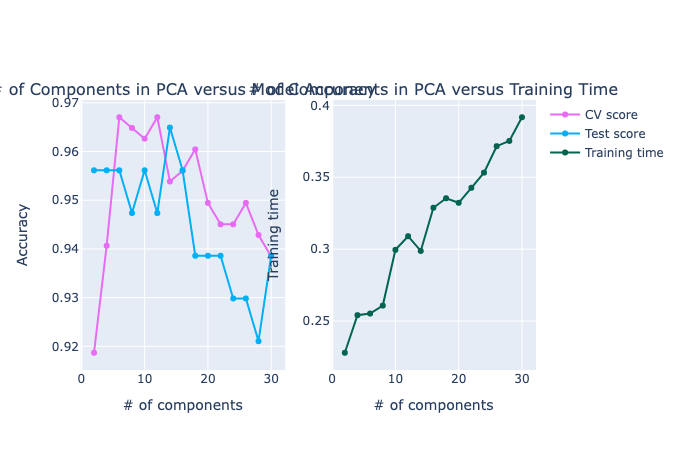

In [30]:
PCA_curves(PCA_cv_score, PCA_test_score, PCA_cv_training_time)

In [31]:
i =PCA_test_score.index(max(PCA_test_score))
pca = PCA(n_components=(i+2)*2, svd_solver="full",random_state=random_state)
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)
cv_results, best_param, best_result = modelselection(classifier_rf,parameters_rf, scoring, X_PCA_train)
rf_PCA = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                criterion = best_param['criterion'],
                                bootstrap = best_param['bootstrap'],
                                random_state=random_state)
rf_PCA.fit(X_PCA_train, y_train)
rf_PCA_metrics = metrics(X_PCA_test,rf_PCA)

The best parameters for classifier is {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 100}
The best training score is 0.956:
Accuracy=0.956
Sensitivity=0.953
Specificity=0.958
Precision=0.932
F-measure=0.943
